## Problem Framing & Big Picture
### 1. Problem and objective in business terms and how the solution will be used.
In this project, we aim to address a critical challenge within the Portuguese school system by developing a machine learning model to predict students' final grades (G3) without the input of their first (G1) and second (G2) term grades. This approach focuses on early identification of students who may require additional support and interventions to improve their academic performance. The model will serve as a proactive tool for the school's advising team. The implementation of this predictive model promises to improve student retention rates, boost the school system's reputation through enhanced academic outcomes, and lead to better overall student success.

### 2. Problem Framing

This project is best framed as a supervised learning problem that operates in an offline environment. Supervised learning is a type of machine learning where the model is trained on a labeled dataset, which means that each example in the training set is accompanied by the correct output. In the context of predicting student performance, the model learns from historical data that includes both the features (such as demographic and academic attributes) and the target variable (the final grade, G3). This approach allows the model to learn the relationships between the features and the target, enabling it to make predictions for new, unseen data. On the other hand, unsupervised learning involves working with datasets without labeled outcomes, focusing on identifying patterns or structures within the data.

### 3. Machine Learning Approach (Classification)

For this project, we will focus on a classification task as the specific machine learning approach to predict whether a student passes or fails based on their final G3 grade. Classification involves categorizing data into predefined groups or classes. In our context, this means determining if a student's performance will result in a pass or fail outcome, simplifying the target into a binary choice that directly aligns with the need for intervention. This approach is chosen over regression, which predicts a continuous quantity (the exact final grade), because it more directly addresses the business problem of identifying students who require additional support. By classifying students into "pass" or "fail" categories, the school can efficiently allocate resources and support to those most in need, thereby preventing failures and improving overall student success rates. This method simplifies the decision-making process for interventions and is particularly effective in educational settings where the primary concern is ensuring students achieve a minimum level of proficiency.

### 4. Metrics for measuring model performance
To measure the performance of our classification model, we will primarily use accuracy, precision, recall, and the F1 score as our metrics. Accuracy indicates the proportion of total predictions our model gets right, combining both pass and fail predictions. However, accuracy alone might not give a complete picture, especially if our data is imbalanced (e.g., more pass cases than fail). Precision measures the proportion of positive identifications (students predicted to fail) that were actually correct, which is crucial for ensuring that interventions are not mistakenly targeted. Recall, or sensitivity, assesses the proportion of actual fails that were correctly identified, highlighting the model's ability to catch all at-risk students. The F1 score harmonizes precision and recall into a single metric, balancing the trade-off between the two and providing a comprehensive measure of the model's performance in cases where an equal importance is placed on both precision and recall.



## Get the data


## 1. Import data

In [ ]:
import pandas as pd

# Load the dataset
data = '/content/student-mat.csv'
df = pd.read_csv(data)

### 2. The size and type of data

In [ ]:

#Size of the dataset
print("Dataset size (rows, columns):", df.shape)

# Data types of each column
print("Data types of each column:\n", df.dtypes)

Dataset size (rows, columns): (395, 35)
Data types of each column:
 school          object
sex             object
age            float64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences_G1    float64
absences_G2    float64
absences_G3    float64
G1               int64
G2               int64
G3               int64
dtype: object


## 3. Available features and description

*   school: The student's school (GP - Gabriel Pereira or MS - Mousinho da Silveira).
*   sex: The student's sex (F - female or M - male).
*   age: The student's age (numeric: from 15 to 22).
*   address: The student's home address type (U - urban or R - rural).
*   famsize: Family size (LE3 - less or equal to 3 or GT3 - greater than 3).
*  Pstatus: Parent's cohabitation status (T - living together or A - apart).
*   Medu: Mother's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education, 4 – higher education).
*   Fedu: Father's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education, 4 – higher education).
*   Mjob: Mother's job (teacher, health care related, civil services (e.g., administrative or police), at_home, or other).
*   Fjob: Father's job (teacher, health care related, civil services (e.g., administrative or police), at_home, or other).
*   reason: Reason to choose this school (close to home, school reputation, course preference, or other).
*   guardian: Student's guardian (mother, father, or other).
*   traveltime: Home to school travel time (1 - <15 min, 2 - 15 to 30 min, 3 - 30 min. to 1 hour, 4 - >1 hour).
*   studytime: Weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours).
*   failures: Number of past class failures (n if 1<=n<3, else 4).
*   schoolsup: Extra educational support (yes or no).
*   famsup: Family educational support (yes or no).


*   paid: Extra paid classes within the course subject (Math or Portuguese) (yes or no).

*   activities: Extra-curricular activities (yes or no).
*   nursery: Attended nursery school (yes or no).


*   higher: Wants to take higher education (yes or no).


*   internet: Internet access at home (yes or no).

*   romantic: In a romantic relationship (yes or no).
*   famrel: Quality of family relationships (from 1 - very bad to 5 - excellent).

*   freetime: Free time after school (from 1 - very low to 5 - very high).
*   goout: Going out with friends (from 1 - very low to 5 - very high).
*   rDalc: Workday alcohol consumption (from 1 - very low to 5 - very high).
*   rWalc: Weekend alcohol consumption (from 1 - very low to 5 - very high).
*   health: Current health status (from 1 - very bad to 5 - very good).
*   absences_G1, absences_G2, absences_G3: Number of school absences for G1,G2, and G3 terms (numeric).
*   G1, G2, G3: First term, second term, and final grade (numeric: from 0 to 20).




### 4. Target Variable
The target variable is G3, which will be used to determine whether a student passes or fails

### 5. Training and test data

In [31]:
from sklearn.model_selection import train_test_split

# Transform 'G3' into a binary variable for classification ('Pass' column: 1 for pass, 0 for fail)
df['Pass'] = (df['G3'] >= 10).astype(int)

# Define the features (X) and the target variable (y)
X = df.drop(['G3', 'Pass'], axis=1)
y = df['Pass']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Explore the data

### 1. Training set attributes and their characteristics

In [32]:
# Descriptive statistics for numerical features
print("Descriptive Statistics for Numerical Features:")
print(X_train.describe())

# Descriptive statistics for categorical features
print("\nDescriptive Statistics for Categorical Features:")
print(X_train.describe(include=['object']))

Descriptive Statistics for Numerical Features:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  305.000000  316.000000  316.000000  316.000000  316.000000  316.000000   
mean    16.747541    2.734177    2.544304    1.430380    2.047468    0.335443   
std      1.274188    1.080375    1.078476    0.688842    0.836258    0.735588   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    3.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  316.000000  316.000000  316.000000  316.000000  316.000000  316.000000   
mean     3.943038    3.218354    3.161392    1.500000    2.34

### 2. Visualizations using the training data

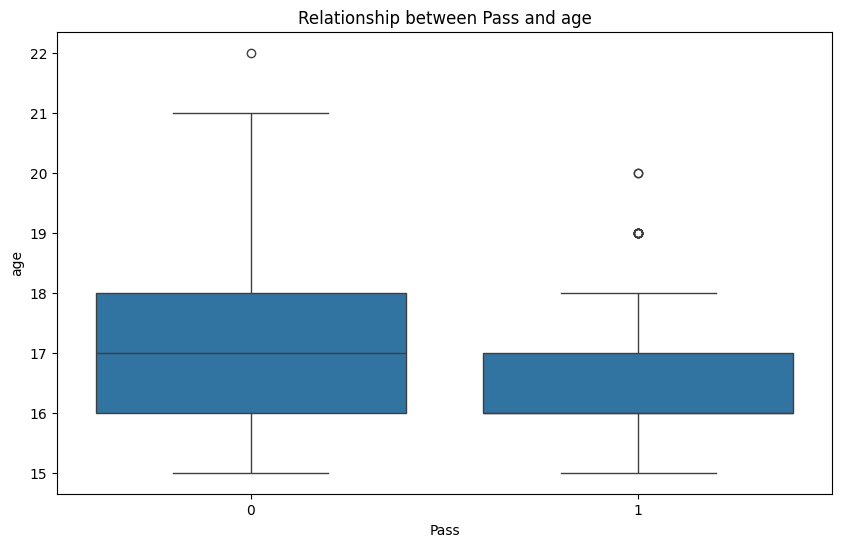

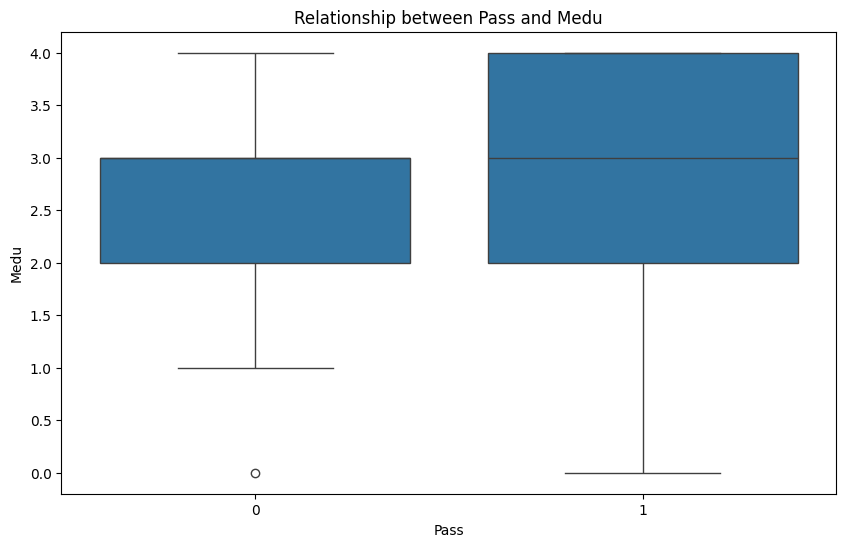

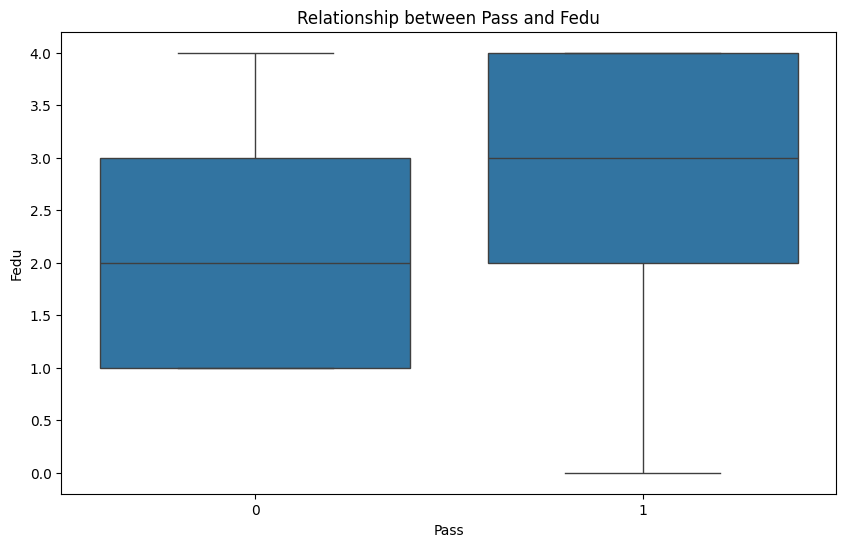

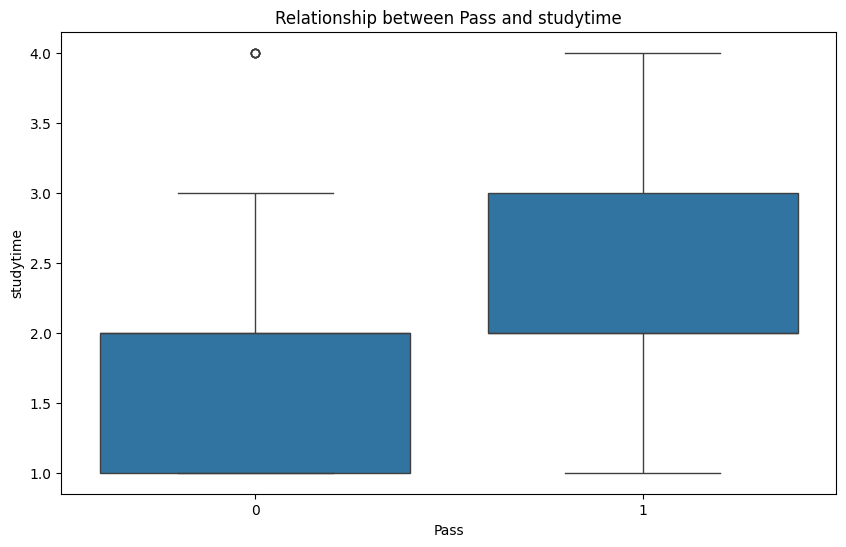

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merging X_train with y_train for visualization
train_dataset = X_train.copy()
train_dataset['Pass'] = y_train

for column in ['age', 'Medu', 'Fedu', 'studytime']:
    if column in train_dataset.columns:
        plt.figure(figsize=(10,6))
        sns.boxplot(x='Pass', y=column, data=train_dataset)
        plt.title(f'Relationship between Pass and {column}')
        plt.show()

This histogram shows the distribution of students' ages, stacked by whether they passed or failed (Pass attribute). Overlaying a kernel density estimate (KDE) helps understand the age density.

Importance:
Understanding age distribution relative to pass/fail status can reveal if certain age groups are more prone to failing.

Insights:
Certain ages have higher failure rates, indicating that interventions could be age-targeted.

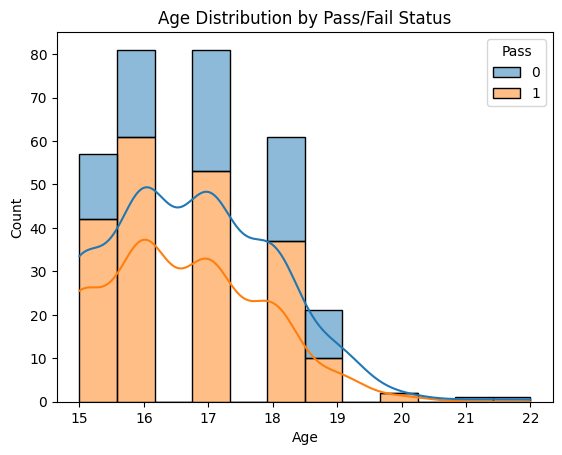

In [ ]:
sns.histplot(data=train_dataset, x='age', hue='Pass', multiple='stack', kde=True)
plt.title('Age Distribution by Pass/Fail Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Explanation:
This boxplot compares the distribution of weekly study time between students who passed and those who failed.

Importance:
It highlights the importance of study time as a factor in academic success.

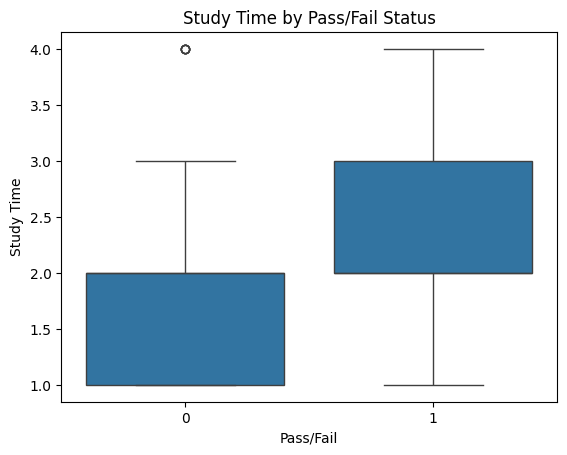

In [ ]:
sns.boxplot(data=train_dataset, x='Pass', y='studytime')
plt.title('Study Time by Pass/Fail Status')
plt.xlabel('Pass/Fail')
plt.ylabel('Study Time')
plt.show()


Explanation:
This heatmap displays the correlation coefficients between numerical features, including the newly binary Pass variable.

Importance:
Understanding how different numerical features correlate with each other and with the pass/fail status can uncover predictors of student performance.

Insights:
Strong correlations (positive or negative) can guide feature selection for modeling. For instance, a high correlation between study time and passing could validate its predictive value.

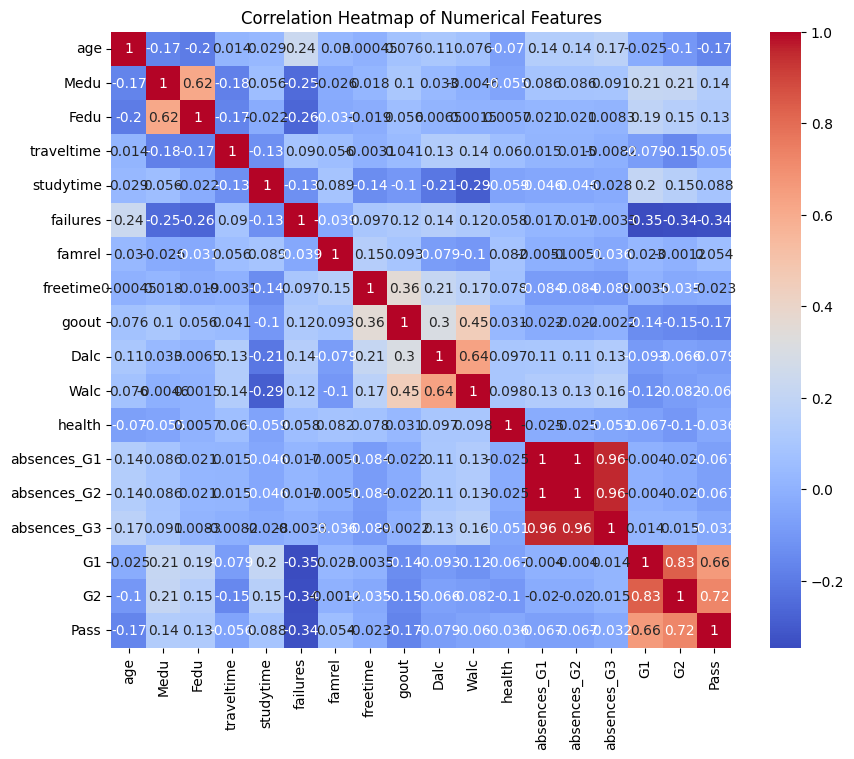

In [ ]:
import numpy as np
plt.figure(figsize=(10, 8))
sns.heatmap(train_dataset.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Objective: Understand the distribution of final grades among students.

Insights: This visualization helps identify the general performance of students and how grades are distributed. For instance, if you see a left or right skew, it might indicate grading biases or the effectiveness of the teaching approach.

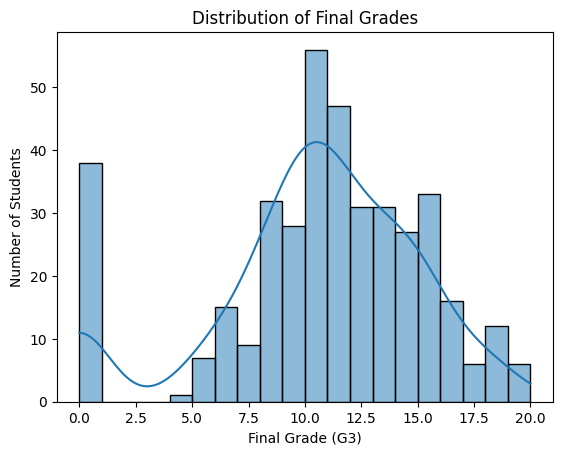

In [ ]:
sns.histplot(data=df, x='G3', bins=20, kde=True)
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.show()


## Prepare the data

### 1. Feature selection to narrow down the data.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):

        # list of feature names to keep.
        self.feature_names = feature_names

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # new DataFrame with only the selected features
        return X[self.feature_names]

# Example
feature_names = ['studytime', 'failures', 'Medu', 'Fedu', 'Dalc', 'Walc', 'absences_G1', 'absences_G2', 'absences_G3']
# Initialize the transformer with the names of features you've decided to keep
selector = FeatureSelector(feature_names=feature_names)

# Transform the training data
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


### 2. Data pipeline to handle the data preparation steps

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Numerical features to scale
numerical_features = ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'Dalc', 'Walc', 'absences_G1', 'absences_G2', 'absences_G3']

# Categorical features to encode
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']

# Creating transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Full pipeline: preprocessing + modeling
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

### 3. Drop the rows or columns with missing values inside the pipeline

In [ ]:
from sklearn.impute import SimpleImputer

# Adjusting the numerical_transformer to fill in missing values for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Filling missing values with the mean for numerical features
    ('scaler', StandardScaler())
])

# Adjusting the categorical_transformer to fill in missing values for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Filling missing values with the most frequent value for categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

### 4. Custom transformer for the pipeline

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class AbsenceTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_G1_G2=True):
        self.drop_G1_G2 = drop_G1_G2

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        X['total_absences'] = X['absences_G1'] + X['absences_G2'] + X['absences_G3']
        X.drop(['absences_G1', 'absences_G2', 'absences_G3'], axis=1, inplace=True)

        if self.drop_G1_G2:
            X.drop(['G1', 'G2'], axis=1, inplace=True)

        return X

# Incorporating the custom transformer into the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('absence_transform', AbsenceTransformer(drop_G1_G2=True), ['absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2'])
    ], remainder='passthrough')


### 5. Feature scaling on continuous numeric data in the pipeline

In [ ]:
# feature scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputing missing values with the mean
    ('scaler', StandardScaler())  # Scaling the features
])


### 6. Ordinal encode features that are either binary or that are ordinal in nature; and/or one-hot encode nominal or categorical data in a pipeline

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Identify binary/ordinal features and nominal features
binary_ordinal_features = ['Pstatus']  # an example
nominal_features = ['school', 'sex', 'address', 'famsize', 'Mjob', 'Fjob', 'reason', 'guardian']

# Create transformers for binary/ordinal and nominal features
binary_ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Adjust the ColumnTransformer to include these transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('binary_ordinal', binary_ordinal_transformer, binary_ordinal_features),
        ('nominal', nominal_transformer, nominal_features),
        ('absence_transform', AbsenceTransformer(drop_G1_G2=True), ['absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2'])
    ], remainder='passthrough')

 ### 7. Column Transformer to transform the numeric and categorical data

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('binary_ordinal', binary_ordinal_transformer, binary_ordinal_features),
        ('nominal', nominal_transformer, nominal_features),

        # Ensure the custom absence_transform is properly integrated if needed
    ], remainder='passthrough')

### 8. Transform the training data using the above data preparation steps and pipelines and the output of the shape of your two transformed training sets

In [ ]:
# Pipeline without dropping G1/G2
pipeline_with_G1_G2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

# Adjusting the absence_transformer within the preprocessor for this scenario
preprocessor_with_G1_G2 = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('binary_ordinal', binary_ordinal_transformer, binary_ordinal_features),
        ('nominal', nominal_transformer, nominal_features),
        ('absence_transform', AbsenceTransformer(drop_G1_G2=False), ['absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2'])
    ], remainder='passthrough')

# Pipeline with dropping G1/G2
pipeline_without_G1_G2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

# Transforming the training data
X_train_transformed_with_G1_G2 = pipeline_with_G1_G2.fit_transform(X_train)
X_train_transformed_without_G1_G2 = pipeline_without_G1_G2.fit_transform(X_train)

# Output the shape of the two transformed training sets
print("Shape with G1/G2 columns:", X_train_transformed_with_G1_G2.shape)
print("Shape without G1/G2 columns:", X_train_transformed_without_G1_G2.shape)

Shape with G1/G2 columns: (316, 51)
Shape without G1/G2 columns: (316, 51)


## Shortlisting Promising Models


### 1. Fit three promising models

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Transform 'G3' into a binary variable for classification ('Pass' column: 1 for pass, 0 for fail)
df['Pass'] = (df['G3'] >= 10).astype(int)

# Handling missing values for 'age' by imputing the median
df['age'] = df['age'].fillna(df['age'].median())

# Define the features (X) and the target variable (y)
X = df.drop(['G3', 'Pass'], axis=1)  # Excludes the 'G3' column and the newly created 'Pass' column
y = df['Pass']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying numerical and categorical features for preprocessing
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Creating preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the models to train
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Dictionary to hold the cross-validated scores
cv_scores = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    # Creating a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Cross-validation scores
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[model_name] = scores.mean()

cv_scores

{'Random Forest': 0.914434523809524,
 'Gradient Boosting': 0.9113095238095237,
 'SVM': 0.8449404761904761,
 'Logistic Regression': 0.9303571428571429}

### 2. Compare all three models both with and without the G1/G2 columns with cross validation.

In [35]:
# One with G1 and G2 and one without
X_including_G1G2 = X.drop(['G1', 'G2'], axis=1)
X_excluding_G1G2 = X

# Splitting both datasets into training and test sets
X_train_incl, X_test_incl, y_train_incl, y_test_incl = train_test_split(X_including_G1G2, y, test_size=0.2, random_state=42)
X_train_excl, X_test_excl, y_train_excl, y_test_excl = train_test_split(X_excluding_G1G2, y, test_size=0.2, random_state=42)

# Updating numerical_features and categorical_features for X_including_G1G2
numerical_features_incl = X_train_incl.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_incl = X_train_incl.select_dtypes(include=['object']).columns.tolist()

# Preprocessors for both versions
preprocessor_incl = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features_incl),
        ('cat', categorical_transformer, categorical_features_incl)
    ])

preprocessor_excl = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Dictionary to hold the cross-validated scores for both scenarios
cv_scores_incl = {}
cv_scores_excl = {}

# Fit and evaluate models for both versions of the dataset
for model_name, model in models.items():
    # Pipeline for dataset including G1 and G2
    pipeline_incl = Pipeline(steps=[('preprocessor', preprocessor_incl),
                                    ('model', model)])

    # Pipeline for dataset excluding G1 and G2
    pipeline_excl = Pipeline(steps=[('preprocessor', preprocessor_excl),
                                    ('model', model)])

    # Cross-validation scores for dataset including G1 and G2
    scores_incl = cross_val_score(pipeline_incl, X_train_incl, y_train_incl, cv=5, scoring='accuracy')
    cv_scores_incl[model_name] = scores_incl.mean()

    # Cross-validation scores for dataset excluding G1 and G2
    scores_excl = cross_val_score(pipeline_excl, X_train_excl, y_train_excl, cv=5, scoring='accuracy')
    cv_scores_excl[model_name] = scores_excl.mean()

(cv_scores_incl, cv_scores_excl)

({'Random Forest': 0.6898809523809524,
  'Gradient Boosting': 0.6676091269841269,
  'SVM': 0.7184523809523811,
  'Logistic Regression': 0.6453373015873016},
 {'Random Forest': 0.914434523809524,
  'Gradient Boosting': 0.9113095238095237,
  'SVM': 0.8449404761904761,
  'Logistic Regression': 0.9303571428571429})

## Fine tune the system

### One grid search to fine-tune hyperparameters

In [40]:
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestClassifier(random_state=42)

# Pipeline for Random Forest excluding G1 and G2
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor_incl),
                              ('model', model_rf)])

# Parameters grid for Random Forest
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 4, 6],
    'model__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=1)

grid_search_rf.fit(X_train_incl, y_train_incl)

# Best parameters and best score after adjustment
best_params_rf_adjusted = grid_search_rf.best_params_
best_score_rf_adjusted = grid_search_rf.best_score_

(best_params_rf_adjusted, best_score_rf_adjusted)

({'model__max_depth': 10,
  'model__min_samples_leaf': 2,
  'model__min_samples_split': 6,
  'model__n_estimators': 100},
 0.7152777777777779)

### 2. Transforming the test data using the pipeline

In [44]:
# Drop 'G1' and 'G2' from the test set if excluding them
X_test_excluding_G1G2 = X_test.drop(['G1', 'G2'], axis=1)

# Transform the test data using the preprocessor component of the best estimator found by your grid search
X_test_transformed = grid_search_rf.best_estimator_.named_steps['preprocessor'].transform(X_test_excluding_G1G2)


### 3. Final model and a measure of perfomance

In [41]:
# Transform the test data
X_test_excluding_G1G2 = X_test.drop(['G1', 'G2'], axis=1)
X_test_transformed = grid_search_rf.best_estimator_.named_steps['preprocessor'].transform(X_test_excluding_G1G2)

# Make predictions with the best model
best_model = grid_search_rf.best_estimator_.named_steps['model']
predictions = best_model.predict(X_test_transformed)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.6835443037974683
Precision: 0.684931506849315
Recall: 0.9615384615384616
F1 Score: 0.7999999999999999


## Conclusion
The model demonstrates a strong ability to identify students who will pass, as evidenced by its high recall. However, its accuracy and precision suggest that there is a notable proportion of instances where it either incorrectly predicts passing (false positives) or fails to identify failing students accurately. The high recall paired with the reasonable F1 score suggests the model is particularly useful in scenarios where it's critical to identify as many passing students as possible, even at the expense of some false positives.

Given the model's current performance, it could serve as a valuable tool for early identification of students likely to pass, enabling targeted interventions for those at risk of failing. However, stakeholders should be aware of the model's limitations, particularly in terms of its precision and the proportion of false positives, when making decisions based on its predictions.